In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent


In [3]:
import pandas as pd

data = {
    "Teams": [
        "Kolkata Knight Riders", "Sunrisers Hyderabad", "Rajasthan Royals",
        "Royal Challengers Bengaluru", "Chennai Super Kings", "Delhi Capitals",
        "Lucknow Super Giants", "Gujarat Titans", "Punjab Kings", "Mumbai Indians"
    ],
    "M": [14] * 10,
    "W": [9, 8, 8, 7, 7, 7, 7, 5, 5, 4],
    "L": [3, 5, 5, 7, 7, 7, 7, 7, 9, 10],
    "T": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "N/R": [2, 1, 1, 0, 0, 0, 0, 2, 0, 0],
    "PT": [20, 17, 17, 14, 14, 14, 14, 12, 10, 8],
    "NRR": [1.428, 0.414, 0.273, 0.459, 0.392, -0.377, -0.667, -1.063, -0.353, -0.318]
}

df = pd.DataFrame(data)
print(df)


                         Teams   M  W   L  T  N/R  PT    NRR
0        Kolkata Knight Riders  14  9   3  0    2  20  1.428
1          Sunrisers Hyderabad  14  8   5  0    1  17  0.414
2             Rajasthan Royals  14  8   5  0    1  17  0.273
3  Royal Challengers Bengaluru  14  7   7  0    0  14  0.459
4          Chennai Super Kings  14  7   7  0    0  14  0.392
5               Delhi Capitals  14  7   7  0    0  14 -0.377
6         Lucknow Super Giants  14  7   7  0    0  14 -0.667
7               Gujarat Titans  14  5   7  0    2  12 -1.063
8                 Punjab Kings  14  5   9  0    0  10 -0.353
9               Mumbai Indians  14  4  10  0    0   8 -0.318


In [4]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

In [6]:
df.loc[:,'Rk']=np.arange(1,11)

In [7]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [8]:
df['Teams'].unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Chennai Super Kings',
       'Delhi Capitals', 'Lucknow Super Giants', 'Gujarat Titans',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [9]:
df.columns

Index(['Rk', 'Badge', 'Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR'], dtype='object')

In [14]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':'#333fff'},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':20},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

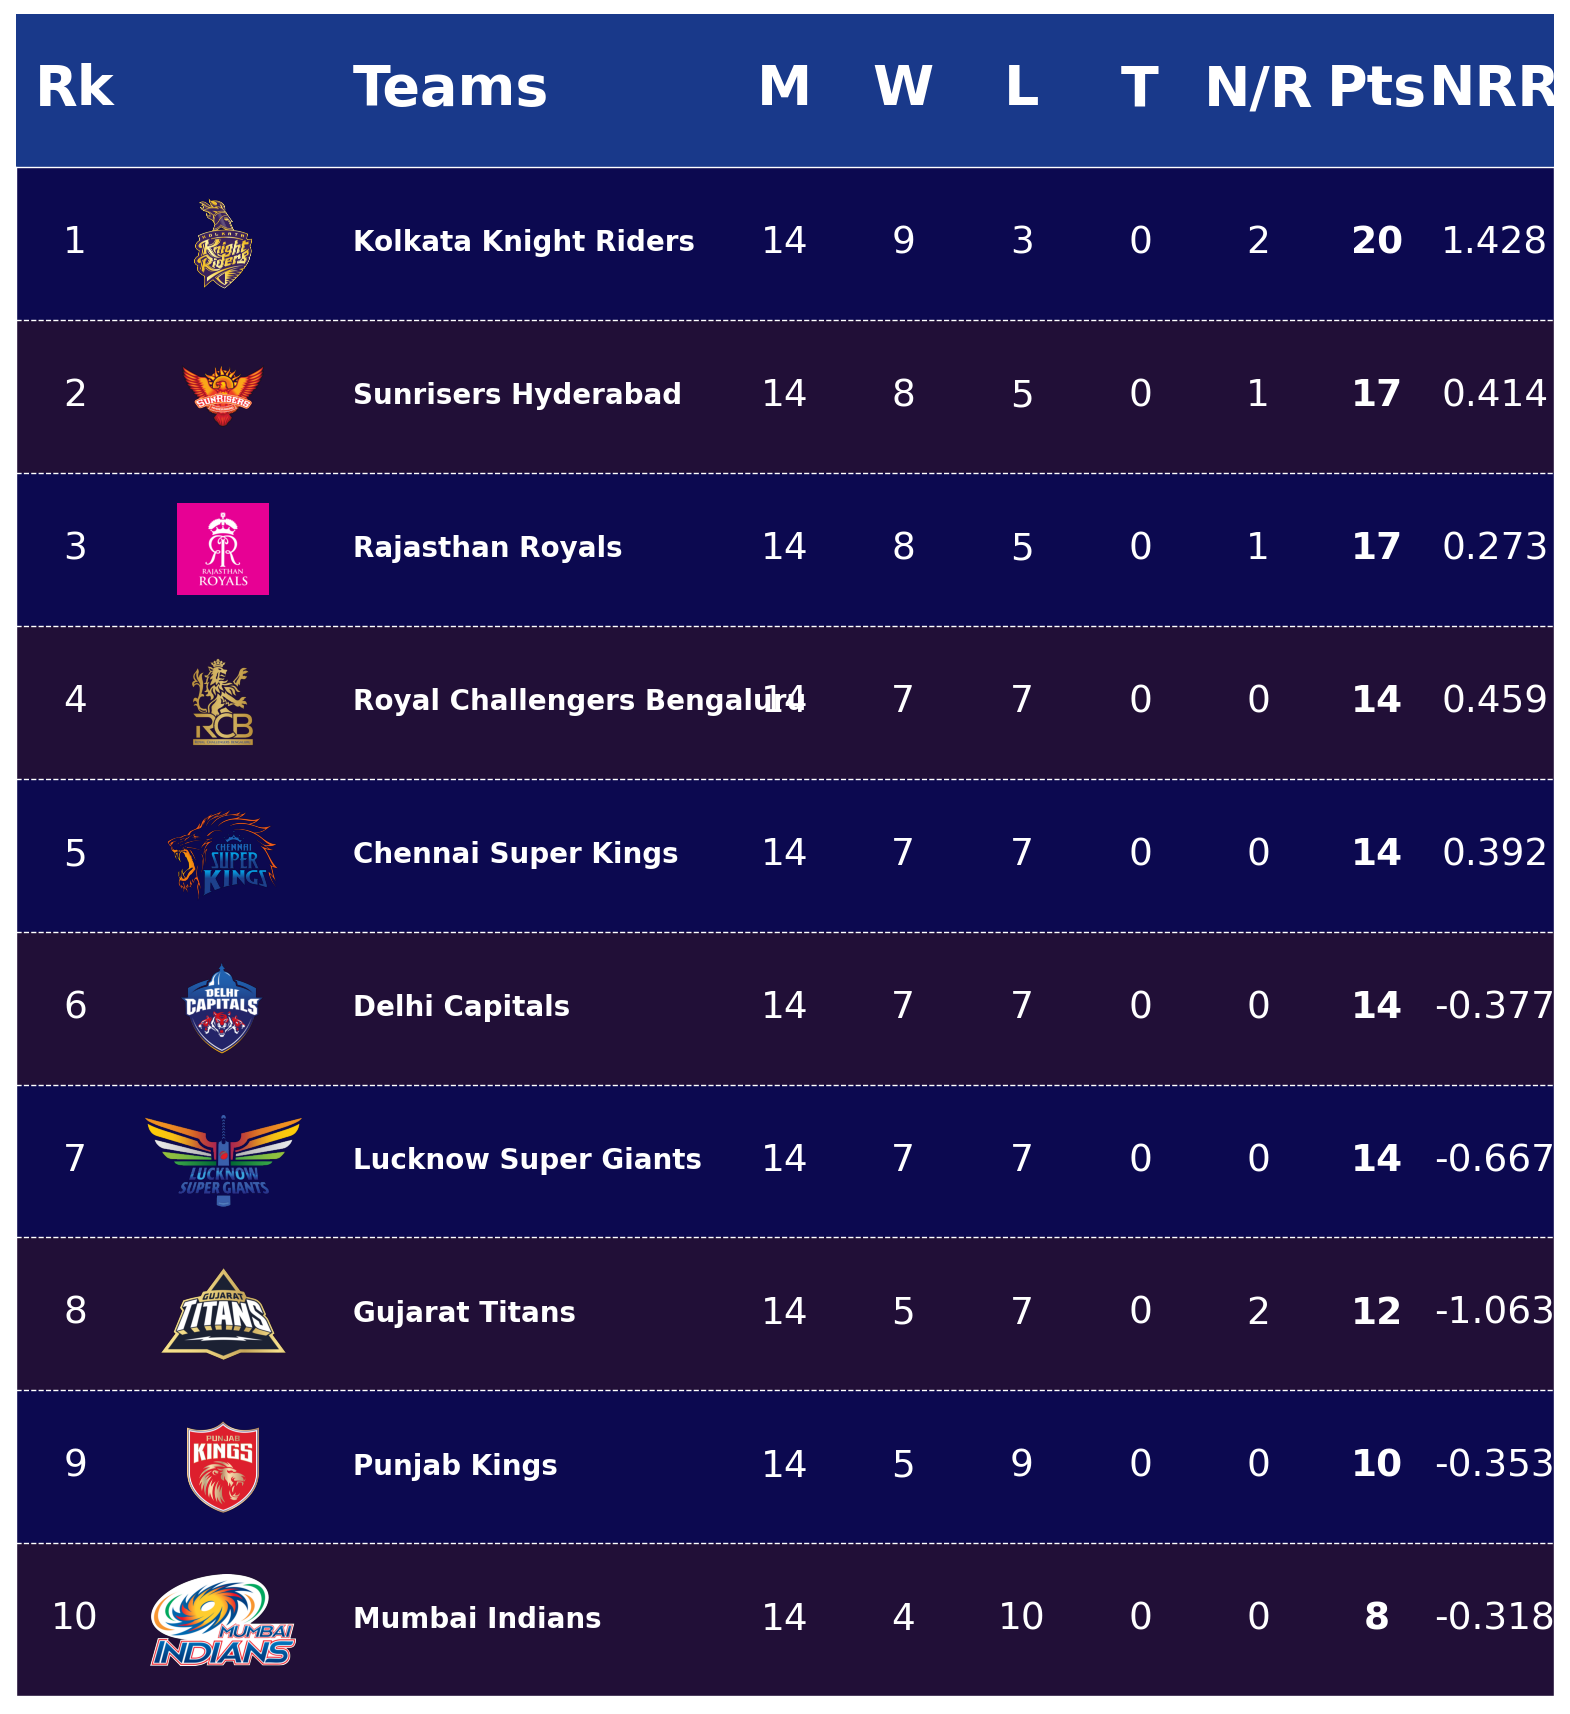

In [15]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#19398A')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

for x in range(0,10):
    if x%2==0:
        table.rows[x].set_facecolor("#0C0950")
        table.rows[0].set_fontcolor("#ffffff")
    else:
        table.rows[x].set_facecolor("#210F37")
        table.rows[0].set_fontcolor("#ffffff")

cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(3.26,4.87,'@copyright',color="black",fontsize=25,alpha=0.5)
plt.show()


In [16]:
fig.savefig(
    "table.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)